In [1]:
import pickle as pkl
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.stats import hmean
import json
import pandas as pd

plt.style.use('seaborn-v0_8')
pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [2]:
models = {
    # "naive_model": "Base",
    # "llama3": "ICL",
    "llama3_ft": "ICL-FT",
    # "rag_untrained": "RAG",
    "rag_trained": "RAG-FT",
    # "memoryllm": "MemLLM",
    # "gnm_ablation": "GNM (Ablation)",
    "gnm": "GNM",
    
}

model_keys = list(models.keys())
model_names = list(models.values())

In [3]:
model_keys, model_names

(['llama3_ft', 'rag_trained', 'gnm'], ['ICL-FT', 'RAG-FT', 'GNM'])

In [4]:
model_colors = {
    "llama3_ft": pal[1],
    "rag_trained": pal[2],
    "gnm": pal[0],
}

20
[ 2.60802578  3.19594871  3.78387122  4.31275198  4.83312586  5.44406524
  5.95042931  6.46930288  6.98267185  7.52356048  8.06444954  8.66338021
  9.22728593  9.7876894  10.3540966  10.94001738 11.47039887 12.04130907
 12.59520802 13.17612584]
20
[2.60802578 3.19594871 3.78387122 4.31275198 4.34707691 4.42838517
 4.42433221 4.43338814 4.43929288 4.43554023 4.45585493 4.47747027
 4.48907885 4.50774182 4.53280992 4.5330599  4.52790678 4.53310981
 4.53436055 4.53631216]
20
[1.69011493 1.69011493 1.69011493 1.69011493 1.69011493 1.69011493
 1.69011493 1.69011493 1.69011493 1.69011493 1.69011493 1.69011493
 1.69011493 1.69011493 1.69011493 1.69011493 1.69011493 1.69011493
 1.69011493 1.69011493]


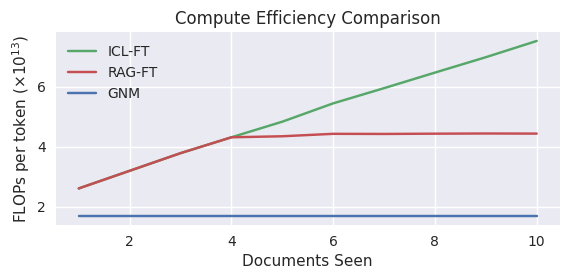

In [23]:
curve_len = 10

X = np.arange(curve_len)+1

data = dict()
scale = 1e13

plt.rcParams["figure.figsize"] = (6.5,2.5)

for model_key, model_name in models.items():

    data_root = f"../data/gnm_experiments/mixed_documents_analysis/{model_key}_flops/summary.json"

    # Open the file and load the data
    with open(data_root, 'r') as json_file:
        data_dict = json.load(json_file)

    data[model_key] = data_dict
    data[model_key]["model_name"] = model_name

    print(len(data_dict["flops_per_token"][0]))

    fpt = np.array(data_dict["flops_per_token"][0])/scale

    print(fpt)

    plt.plot(X, fpt[:curve_len], label=model_name, color=model_colors[model_key])

plt.xlabel("Documents Seen")
plt.ylabel(r"FLOPs per token ($\times 10^{13}$)")

plt.title("Compute Efficiency Comparison")

plt.legend()

plt.savefig("../plots/flops_per_token.png", dpi=600, bbox_inches="tight")
plt.show()
